# <center>3D Slicer Integration </center>

In addition to the basic visualizations provided  by PortPy, we also offer enhanced visualization capabilities through integration with 3D-Slicer. This example showcases these capabilities.

**Note:** Prior to running this notebook, please install 3D-Slicer and the corresponding Slicer Jupyter extension, as detailed in the guide at https://github.com/Slicer/SlicerJupyter. Once the installation is complete, ensure to switch the kernel to the Slicer kernel which would launch an instance of 3D Slicer.


In [9]:
import sys
sys.path.append('..')

In [10]:
import portpy.photon as pp

Creating optimization structures.. It may take some time due to dilation
Optimization structures created!!
Creating BEV..
Loading sparse influence matrix...
Done
Objective Start
Objective done
Constraints Start
Constraints done
Running Optimization..
Optimal value: 87.55191632171741
Elapsed time: 105.02300810813904 seconds


<Axes: xlabel='Dose (Gy)', ylabel='Volume Fraction ($\\%$)'>

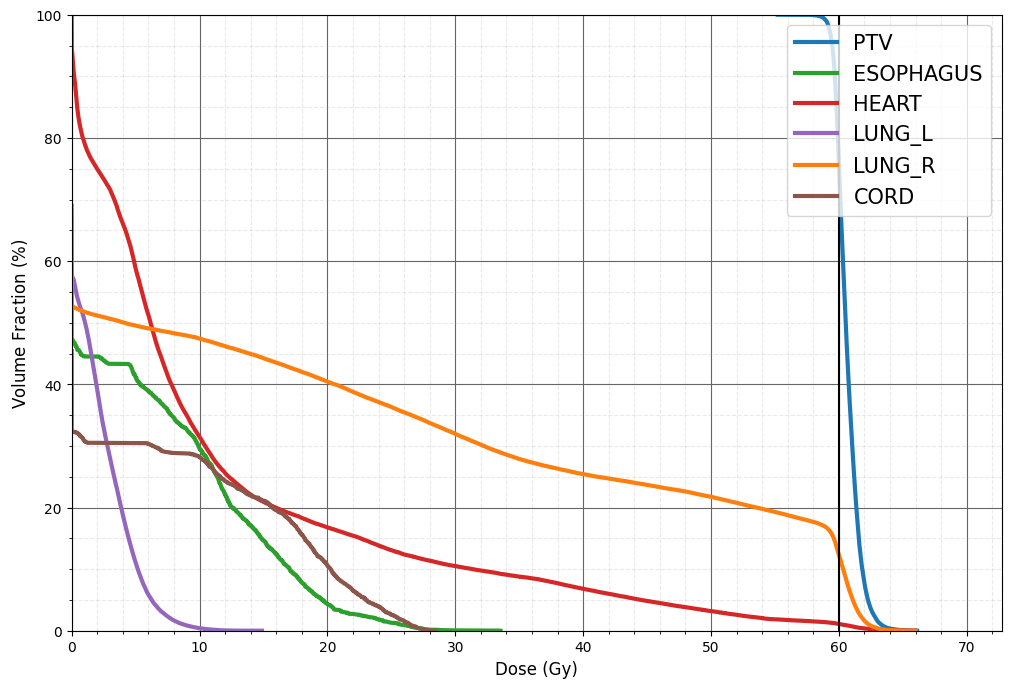

In [11]:
# specify the patient data location.
data_dir = r'A:\Users\lhuss\OneDrive\Documents\GitHub\PortPy\data'
# Use PortPy DataExplorer class to explore PortPy data
data = pp.DataExplorer(data_dir=data_dir)
# Pick a patient 
data.patient_id = 'Lung_Patient_2'
# Load ct, structure set, beams for the above patient using CT, Structures, and Beams classes
ct = pp.CT(data)
structs = pp.Structures(data)
beams = pp.Beams(data)
# Pick a protocol
protocol_name = 'Lung_2Gy_30Fx'
# Load clinical criteria for a specified protocol
clinical_criteria = pp.ClinicalCriteria(data, protocol_name=protocol_name)
# Load hyper-parameter values for optimization problem for a specified protocol
opt_params = data.load_config_opt_params(protocol_name=protocol_name)
# Create optimization structures (i.e., Rinds) 
structs.create_opt_structures(opt_params=opt_params, clinical_criteria=clinical_criteria)
# Load influence matrix
inf_matrix = pp.InfluenceMatrix(ct=ct, structs=structs, beams=beams)

# Create a plan using ct, structures, beams and influence matrix, and clinical criteria
my_plan = pp.Plan(ct = ct, structs = structs, beams = beams, inf_matrix = inf_matrix, clinical_criteria=clinical_criteria)

# Create cvxpy problem using the clinical criteria and optimization parameters
opt = pp.Optimization(my_plan, opt_params=opt_params, clinical_criteria=clinical_criteria)
opt.create_cvxpy_problem()
# Solve the cvxpy problem using Mosek
sol = opt.solve(solver='MOSEK', verbose=False)
# plot dvh for the structures in the given list. Default dose_1d is in Gy and volume is in relative scale(%).
struct_names = ['PTV', 'ESOPHAGUS', 'HEART', 'CORD','LUNG_L','LUNG_R']
pp.Visualization.plot_dvh(my_plan, sol=sol, struct_names=struct_names)


### Visualization using 3D Slicer Jupyter

The initial step involves importing CT images, dose maps, and the structure set into the 3D-Slicer via the 3D-Slicer Jupyter instance. This can be achieved by invoking the *view_in_slicer_jupyter* method provided in the Visualization class, as demonstrated below. After the data has been imported, it will be viewable in the 3D-Slicer instance. The user is then free to manually navigate through the visualization options provided by 3D-Slicer. Moreover, to display the active instance of 3D-Slicer in Jupyter notebook, one can execute the *slicernb.ViewDisplay()* command, as shown below.

In [12]:
pp.Visualization.view_in_slicer_jupyter(my_plan, sol=sol)

Importing struct_name : GTV
Importing struct_name : PTV
Importing struct_name : ESOPHAGUS
Importing struct_name : HEART
Importing struct_name : LUNG_L
Importing struct_name : LUNG_R
Importing struct_name : CORD
Importing struct_name : SKIN
Importing struct_name : BODY
Importing struct_name : LUNGS_NOT_GTV
Importing struct_name : RIND_0
Importing struct_name : RIND_1
Importing struct_name : RIND_2
Importing struct_name : RIND_3
Importing struct_name : RIND_4


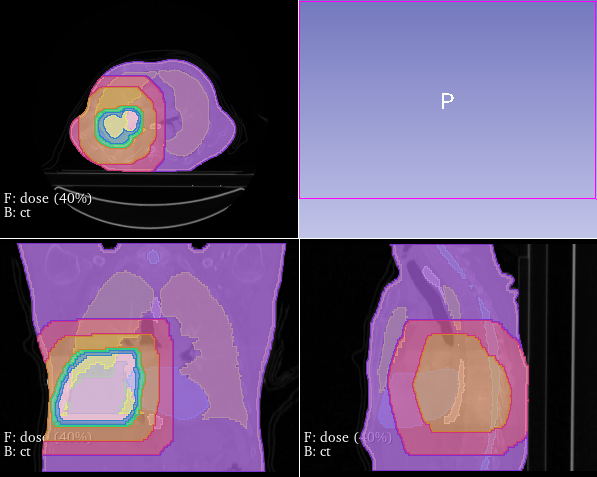

In [10]:
# Display the active instance of 3d slicer in Jupyter Notebook
import JupyterNotebooksLib as slicernb
slicernb.ViewDisplay()